In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings


import threading
import multiprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\ad_mpagrawa\scikit_learn_data


In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [6]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [7]:
X = pd.DataFrame(mnist['data'])
y = mnist['target']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [9]:
X.shape

(70000, 784)

In [10]:
np.array(X.loc[1])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
       253, 255,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        96, 205, 251, 253, 205, 111,   4,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
mnist.data[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

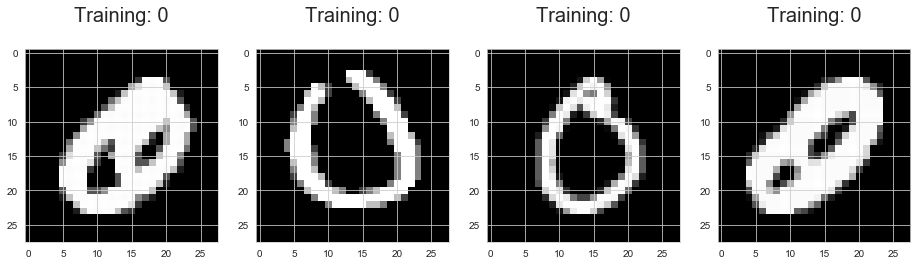

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[1001:1005], y[1001:1005])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [14]:
lm = LogisticRegression()

lm.fit(X_train, y_train)

lm.score(X_test, y_test)

df_coef = pd.DataFrame(data=np.transpose(lm.coef_), index=X.columns)


In [17]:
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred = lm.predict(X_test)

In [16]:
metrics.confusion_matrix(y_test, y_pred)

array([[1998,    0,    3,    4,    3,   10,   20,    2,   18,    2],
       [   2, 2312,    9,    5,    3,   11,    5,    4,   29,    2],
       [  10,   34, 1796,   42,   22,    9,   29,   21,   68,    6],
       [   5,   13,   60, 1898,    8,   60,   10,   26,   48,   19],
       [   4,   10,   12,    5, 1905,    5,   16,    8,   23,   70],
       [  13,   13,   19,   71,   27, 1682,   38,    4,   42,   28],
       [  15,    9,   19,    6,    9,   26, 1908,    1,   20,    1],
       [   8,   13,   30,    7,   35,    4,    3, 1955,    6,   73],
       [  21,   46,   32,   70,   21,   45,   17,   10, 1813,   44],
       [  14,   11,   12,   28,   55,   18,    0,   60,   28, 1886]],
      dtype=int64)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import time
def GridSearch_BestParam(X, y, clf, param_grid):
    rs = ShuffleSplit(n_splits=5,
                           test_size=0.20,
                           random_state=1234)
    cv_sets =rs.get_n_splits(X.shape[0])
    
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv_sets)
    start= time.time()
    print(start)
    grid_search.fit(X,y)
    end = time.time()
    print(end)
    #top_params=grid_search.grid_scores_
    #top_params=grid_search.best_scores_
    top_params=grid_search.best_params_
    return top_params

In [19]:
param_grid = {'C':[0.25,0.5],
              'penalty':['l2'],
              'solver':['newton-cg','lbfgs','liblinear']}
top_para = GridSearch_BestParam(X_train, y_train, lm, param_grid)

1547667890.0343451
1547751121.463642


In [20]:
top_para

{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [21]:
lm1= LogisticRegression(C=top_para['C'],penalty=top_para['penalty'],solver=top_para['solver'])

In [22]:
scores = cross_val_score(lm1,X,y,scoring='accuracy', cv=10)
scores

array([0.92034261, 0.90762421, 0.91719018, 0.9175832 , 0.905     ,
       0.90755822, 0.90368677, 0.91153351, 0.92138365, 0.92581475])

In [23]:
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)

In [24]:
#Threshold 0.35, records where probability > 0.35 set y 1 else set 0
y1_pred = np.where(lm1.predict_proba(X_test)[:,1] > 0.35,1,0)
print(metrics.classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.11      1.00      0.20      2060
         1.0       0.94      0.98      0.96      2382
         2.0       0.00      0.00      0.00      2037
         3.0       0.00      0.00      0.00      2147
         4.0       0.00      0.00      0.00      2058
         5.0       0.00      0.00      0.00      1937
         6.0       0.00      0.00      0.00      2014
         7.0       0.00      0.00      0.00      2134
         8.0       0.00      0.00      0.00      2119
         9.0       0.00      0.00      0.00      2112

   micro avg       0.21      0.21      0.21     21000
   macro avg       0.10      0.20      0.12     21000
weighted avg       0.12      0.21      0.13     21000

